In [1]:
import pickle
from matplotlib import pyplot as plt
plt.rcParams.update({'font.size': 20})
import numpy as np
import bisect

def fetch(file_fmt, seeds):
    nums, err_1s, err_2s, err_3s = [], [], [], []
    for seed in seeds:
        file_name = file_fmt % seed
        with open(file_name, "rb") as f:
            perf_bern = pickle.load(f)
            num, _err1, _err2, _err3 = zip(*perf_bern)
            ni = bisect.bisect_right(num, 2000)
            
            nums.append(num[:ni])
            err_1s.append(_err1[:ni])
            err_2s.append(_err2[:ni])
            err_3s.append(_err3[:ni])
    _n = min([len(num) for num in nums])
    _e1 = np.mean(np.array([err_1s[ei][:_n] for ei in range(len(seeds))]), axis=0)
    _e2 = np.mean(np.array([err_2s[ei][:_n] for ei in range(len(seeds))]), axis=0)
    _e3 = np.mean(np.array([err_3s[ei][:_n] for ei in range(len(seeds))]), axis=0)
    idxs = np.array([_ for _ in range(_n) if np.random.random() < 0.2])
    return nums[0][:_n], 100*_e1, 100*_e2, 100*_e3

In [2]:
def plot(task, title, save_name, idx=0, legend=False, legend_loc=None, mark=False):
    lw = 3
    if task.endswith('10k'):
        num_errs = fetch("data/" + task + "/bern_gp_explore2_svariance2_width=1_seed=%d.pkl", range(3))
        plt.plot(num_errs[0], num_errs[idx+1], "r-", label="BernGP", linewidth=lw)
    else:
        num_errs = fetch("data/" + task + "/bern_gp_explore_svariance2_seed=%d.pkl", range(3))
        plt.plot(num_errs[0], num_errs[idx+1], "r-", label="BernGP", linewidth=lw)
        
    num_errs = fetch("data/"+task+"/bern_gp_explore2_svariance2_width=3_seed=%d.pkl", range(3))
    plt.plot(num_errs[0], num_errs[idx+1], "m-", label="BernGP-Pool", linewidth=lw)
    
    num_errs = fetch("data/"+task+"/beta_gp_rloss_explore_svariance2_width=1_seed=%d.pkl", range(3))
    plt.plot(num_errs[0], num_errs[idx+1], "y-", label="BetaGP", linewidth=lw)
    
    num_errs = fetch("data/"+task+"/beta_gp_rloss_mixture_explore_svariance2_width=3_seed=%d.pkl", range(3))
    plt.plot(num_errs[0], num_errs[idx+1], "c-", label="BetaGP-Pool", linewidth=lw)
    
    with open("data/%s/cal:full.pkl" % task, "rb") as f:
        num_errs = list(zip(*pickle.load(f)))
        ni = bisect.bisect_right(num_errs[0], 2000)
        num, err = num_errs[0][:ni], 100*np.array(num_errs[idx+1][:ni])
    plt.plot(num, err, "go-", label="Simple")
    plt.title(title,fontdict = {'fontsize' : 20})
    if legend:
        if legend_loc is None:
            legend_loc = 'best'
        plt.legend(prop={'size': 18}, loc=legend_loc)
    if mark:
        plt.xlabel('Number Explored')
        plt.ylabel('MSE')
    plt.tight_layout(pad=0.1)
    plt.savefig(save_name)
    plt.show()

    
def plot2(task, title, save_name, idx=0, legend=False, legend_loc=None, mark=False):
    lw = 3
    num_errs = fetch("data/"+task+"/beta_gp_rloss_mixture_explore_svariance2_width=3_seed=%d.pkl", range(3))
    plt.plot(num_errs[0], num_errs[idx+1], "c-", label="BetaGP-Pool", linewidth=lw)

    num_errs = fetch("data/"+task+"/beta_gp_rloss_explore_svariance2_width=3_seed=%d.pkl", range(3))
    plt.plot(num_errs[0], num_errs[idx+1], "m-", label="BetaGP-Pool-PMixture", linewidth=lw)
    
    plt.title(title,fontdict = {'fontsize' : 20})
    if legend:
        if legend_loc is None:
            legend_loc = 'best'
        plt.legend(prop={'size': 18}, loc=legend_loc)
    if mark:
        plt.xlabel('Number Explored')
        plt.ylabel('MSE')
    plt.tight_layout(pad=0.1)
    plt.savefig(save_name)
    plt.show()


# CelebA

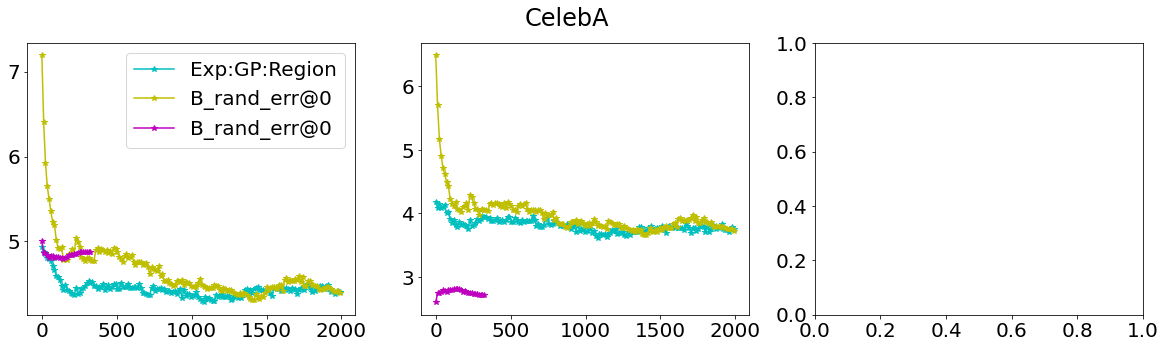

In [82]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
# num, max_err, mean_err, hard_err = fetch("data/celeba/bern_gp_explore2_svariance2_width=1_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "r*-", label="Exp:GP")
# axis[1].plot(num, mean_err, "r*-", label="Exp:GP")
# axis[2].plot(num, hard_err, "r*-", label="Exp:GP")

# num, max_err, mean_err, hard_err = fetch("data/celeba/bern_gp_explore_random_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "k*-", label="Exp:Rand")
# axis[1].plot(num, mean_err, "k*-", label="Exp:Rand")
# axis[2].plot(num, hard_err, "k*-", label="Exp:Rand")

# num, max_err, mean_err, hard_err = fetch("data/celeba/bern_gp_explore2_svariance2_width=3_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "m*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "m*-", label="Exp:GP:Region")

rng = [0, 2]
num, max_err, mean_err, hard_err = fetch("data/celeba/beta_gp_rloss_mixture_explore_svariance2_width=3_seed=%d.pkl", rng)
axis[0].plot(num, max_err, "c*-", label="Exp:GP:Region")
axis[1].plot(num, mean_err, "c*-", label="Exp:GP:Region")

num, max_err, mean_err, hard_err = fetch("data/celeba/beta_gp_rloss_explore_svariance2_width=1_seed=%d.pkl", rng)
axis[0].plot(num, max_err, "y*-", label="B_rand_err@0")
axis[1].plot(num, mean_err, "y*-", label="B_rand_err@3")

num, max_err, mean_err, hard_err = fetch("data/celeba/beta_gp_rloss_mixture_explore_svariance2_ab_width=1_seed=%d.pkl", rng)
axis[0].plot(num, max_err, "m*-", label="B_rand_err@0")
axis[1].plot(num, mean_err, "m*-", label="B_rand_err@3")

# num, max_err, mean_err, hard_err = fetch("data/celeba/beta_gp_rloss_explore_svariance2_width=5_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "b*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "b*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/celeba/beta_gp_rloss_explore_svariance2_width=2_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "k*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "k*-", label="Exp:GP:Region")

# num_errs = fetch("data/celeba/bern_gp_explore_ft=simple_et=svariance2_seed=%d.pkl", range(3))
# for idx in range(3):
#     axis[idx].plot(num_errs[0], num_errs[idx+1], "b*-", label="Expl:GP+Est:Sl")
    
# axis[0].plot(extract(corr_perfs, 0), extract(corr_perfs, 1)*100, "g*-", label='Brute@3')
# axis[1].plot(extract(corr_perfs, 0), extract(corr_perfs, 2)*100, "g*-", label='Brute@5')
# axis[2].plot(extract(corr_perfs, 0), extract(corr_perfs, 3)*100, "g*-", label='Brute@10')

# axis[0].set_ylim(2, 7)
axis[0].legend()
fig.suptitle("CelebA")
# plt.savefig("plots/line_wcorr_beta_vs_normal_explore.png")

plt.show()

# print (perf)
# plot("celeba", "CelebA", "plots/celeba_explore.png")

# Celeba w Private

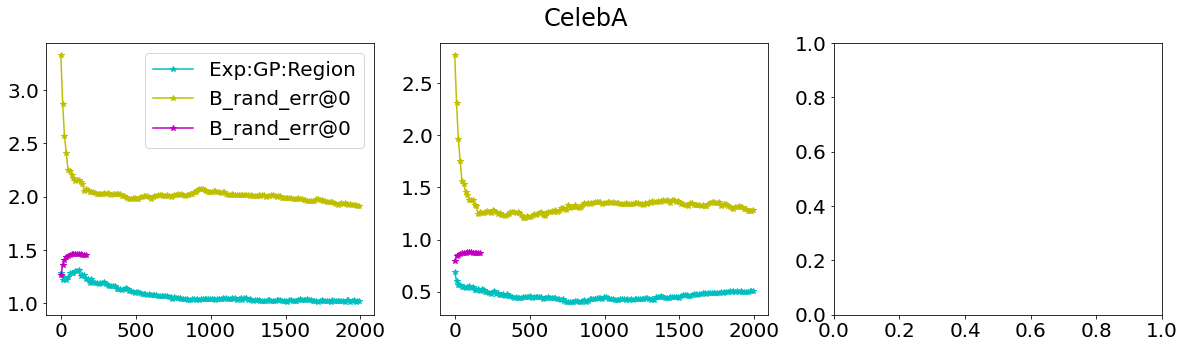

In [15]:
fig, axis = plt.subplots(1, 3, figsize=(20, 5))
# num, max_err, mean_err, hard_err = fetch("data/celeba_private/bern_gp_explore_svariance2_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "r*-", label="Exp:GP")
# axis[1].plot(num, mean_err, "r*-", label="Exp:GP")
# axis[2].plot(num, hard_err, "r*-", label="Exp:GP")

# num, max_err, mean_err, hard_err = fetch("data/celeba_private/bern_gp_explore_random_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "k*-", label="Exp:Rand")
# axis[1].plot(num, mean_err, "k*-", label="Exp:Rand")
# axis[2].plot(num, hard_err, "k*-", label="Exp:Rand")

# num, max_err, mean_err, hard_err = fetch("data/celeba_private/bern_gp_explore2_svariance2_width=3_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "m*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "m*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/celeba_private/beta_gp_rloss_mixture_explore_svariance2_ab_width=3_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "r*-", label="B_rand_err@0")
# axis[1].plot(num, mean_err, "r*-", label="B_rand_err@3")

num, max_err, mean_err, hard_err = fetch("data/celeba_private/beta_gp_rloss_mixture_explore_svariance2_width=3_seed=%d.pkl", range(3))
axis[0].plot(num, max_err, "c*-", label="Exp:GP:Region")
axis[1].plot(num, mean_err, "c*-", label="Exp:GP:Region")

num, max_err, mean_err, hard_err = fetch("data/celeba_private/beta_gp_rloss_explore_svariance2_width=1_seed=%d.pkl", range(3))
axis[0].plot(num, max_err, "y*-", label="B_rand_err@0")
axis[1].plot(num, mean_err, "y*-", label="B_rand_err@3")

num, max_err, mean_err, hard_err = fetch("data/celeba_private/beta_gp_rloss_mixture_explore_svariance2_ab_width=1_seed=%d.pkl", range(3))
axis[0].plot(num, max_err, "m*-", label="B_rand_err@0")
axis[1].plot(num, mean_err, "m*-", label="B_rand_err@3")

# num, max_err, mean_err, hard_err = fetch("data/celeba_private/beta_gp_rloss_explore_svariance2_width=5_seed=%d.pkl", range(2))
# axis[0].plot(num, max_err, "b*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "b*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/celeba_private/beta_gp_rloss_explore_svariance2_width=2_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "k*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "k*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/celeba_private/beta_gp_rloss_explore_random_width=[(1, 1), (2, 1), (3, 1)]_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "m*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "m*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/celeba_private/beta_gp_rloss_explore_random_width=1_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "k*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "k*-", label="Exp:GP:Region")


def extract(arr, _):
    return np.array([_a[_] for _a in arr])
    
# axis[0].plot(extract(corr_perfs, 0), extract(corr_perfs, 1)*100, "g*-", label='Brute@3')
# axis[1].plot(extract(corr_perfs, 0), extract(corr_perfs, 2)*100, "g*-", label='Brute@5')
# axis[2].plot(extract(corr_perfs, 0), extract(corr_perfs, 3), "g*-", label='Brute@10')

axis[0].legend()
fig.suptitle("CelebA")
# plt.savefig("plots/line_wcorr_beta_vs_normal_explore.png")

# axis[0].set_ylim(1, 3)
plt.show()
# print (perf)
# plot("celeba_private", "IMDB:MF", "plots/celebap_explore.png")
# plot("celeba_private", "IMDB:MF@0.3", "plots/celebap_explore2.png", idx=1)

# COCOS

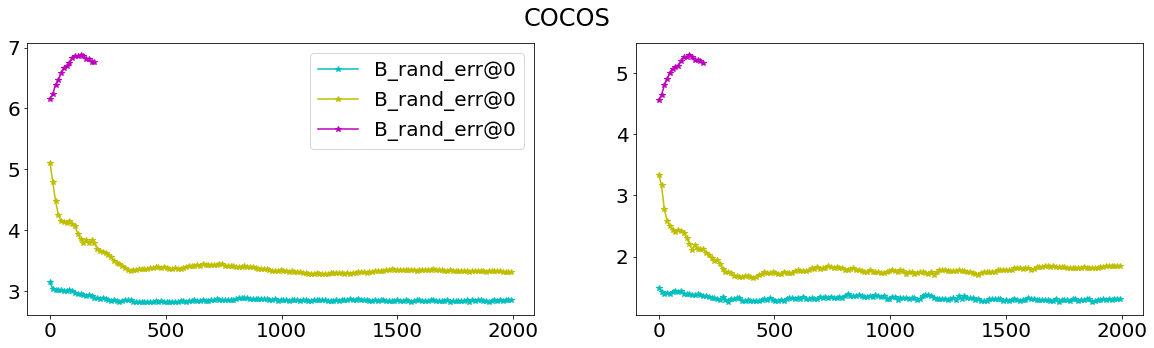

In [13]:
fig, axis = plt.subplots(1, 2, figsize=(20, 5))
# num, max_err, mean_err, hard_err = fetch("data/cocos3/bern_gp_explore_svariance2_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "r*-", label="B_err@0")
# axis[1].plot(num, mean_err, "r*-", label="B_err@3")

# num, max_err, mean_err, hard_err = fetch("data/cocos3/bern_gp_explore_random_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "k*-", label="B_rand_err@0")
# axis[1].plot(num, mean_err, "k*-", label="B_rand_err@3")

# num, max_err, mean_err, hard_err = fetch("data/cocos3/bern_gp_explore2_svariance2_width=3_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "m*-", label="B_rand_err@0")
# axis[1].plot(num, mean_err, "m*-", label="B_rand_err@3")

# num, max_err, mean_err, hard_err = fetch("data/cocos3/beta_gp_rloss_mixture_explore_svariance2_ab_width=3_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "r*-", label="B_rand_err@0")
# axis[1].plot(num, mean_err, "r*-", label="B_rand_err@3")

num, max_err, mean_err, hard_err = fetch("data/cocos3/beta_gp_rloss_mixture_explore_svariance2_width=3_seed=%d.pkl", range(3))
axis[0].plot(num, max_err, "c*-", label="B_rand_err@0")
axis[1].plot(num, mean_err, "c*-", label="B_rand_err@3")

num, max_err, mean_err, hard_err = fetch("data/cocos3/beta_gp_rloss_explore_svariance2_width=1_seed=%d.pkl", range(3))
axis[0].plot(num, max_err, "y*-", label="B_rand_err@0")
axis[1].plot(num, mean_err, "y*-", label="B_rand_err@3")

num, max_err, mean_err, hard_err = fetch("data/cocos3/beta_gp_rloss_mixture_explore_svariance2_ab_width=1_seed=%d.pkl", range(3))
axis[0].plot(num, max_err, "m*-", label="B_rand_err@0")
axis[1].plot(num, mean_err, "m*-", label="B_rand_err@3")

# num, max_err, mean_err, hard_err = fetch("data/cocos3/beta_gp_rloss_explore_svariance2_width=5_seed=%d.pkl", range(2))
# axis[0].plot(num, max_err, "b*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "b*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/cocos3/beta_gp_rloss_explore_svariance2_width=2_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "k*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "k*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/cocos3/beta_gp_rloss_explore_svariance2_width=3_st=raw_seed=%d.pkl", range(2))
# axis[0].plot(num, max_err, "b*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "b*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/cocos3/beta_gp_rloss_explore_random_width=[(1, 1), (2, 1), (3, 1)]_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "m*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "m*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/cocos3/beta_gp_rloss_explore_random_width=1_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "k*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "k*-", label="Exp:GP:Region")
    
# num_errs = fetch("data/cocos3/bern_gp_explore_ft=simple_et=svariance2_seed=%d_2.pkl", range(3))
# for idx in range(2):
#     axis[idx].plot(num_errs[0], num_errs[idx+1], "b*-", label="Expl:GP+Est:Sl")
# axis[0].plot(extract(corr_perfs, 0), extract(corr_perfs, 1), "g*-", label='Cal@0')
# axis[1].plot(extract(corr_perfs, 0), extract(corr_perfs, 2), "g*-", label='Cal@3')
# axis[2].plot(extract(corr_perfs, 0), extract(corr_perfs, 3), "g*-", label='Cal@7')

axis[0].legend()
    
# axis[0].set_ylim(2, 6)
fig.suptitle("COCOS")
# plt.savefig("cocos_explore.png")
plt.show()

# print (perf)
# plot("cocos3", "COCOS", "plots/cocos_explore.png")

# COCOS on 10K

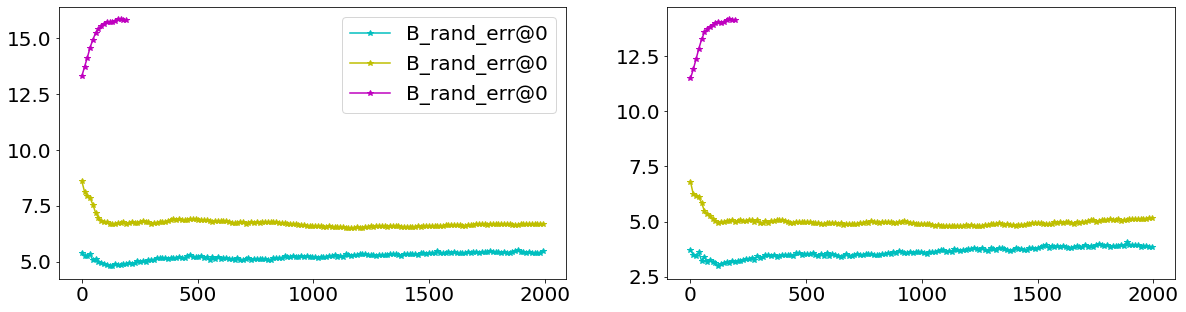

In [14]:
fig, axis = plt.subplots(1, 2, figsize=(20, 5))

# num, max_err, mean_err, hard_err = fetch("data/cocos3_10k/bern_gp_explore2_svariance2_width=1_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "r*-", label="B_rand_err@0")
# axis[1].plot(num, mean_err, "r*-", label="B_rand_err@3")

# num, max_err, mean_err, hard_err = fetch("data/cocos3_10k/bern_gp_explore2_svariance2_width=3_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "m*-", label="B_rand_err@0")
# axis[1].plot(num, mean_err, "m*-", label="B_rand_err@3")

rng = [0, 1, 2]
num, max_err, mean_err, hard_err = fetch("data/cocos3_10k/beta_gp_rloss_mixture_explore_svariance2_width=3_seed=%d.pkl", rng)
axis[0].plot(num, max_err, "c*-", label="B_rand_err@0")
axis[1].plot(num, mean_err, "c*-", label="B_rand_err@3")

num, max_err, mean_err, hard_err = fetch("data/cocos3_10k/beta_gp_rloss_explore_svariance2_width=1_seed=%d.pkl", rng)
axis[0].plot(num, max_err, "y*-", label="B_rand_err@0")
axis[1].plot(num, mean_err, "y*-", label="B_rand_err@3")

num, max_err, mean_err, hard_err = fetch("data/cocos3_10k/beta_gp_rloss_mixture_explore_svariance2_ab_width=1_seed=%d.pkl", rng)
axis[0].plot(num, max_err, "m*-", label="B_rand_err@0")
axis[1].plot(num, mean_err, "m*-", label="B_rand_err@3")

# num, max_err, mean_err, hard_err = fetch("data/cocos3_10k/beta_gp_rloss_explore_svariance2_width=5_seed=%d.pkl", range(2))
# axis[0].plot(num, max_err, "b*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "b*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/cocos3_10k/beta_gp_rloss_explore_svariance2_width=2_seed=%d.pkl", range(3))
# axis[0].plot(num, max_err, "k*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "k*-", label="Exp:GP:Region")

# num, max_err, mean_err, hard_err = fetch("data/cocos3_10k/beta_gp_rloss_explore_svariance2_width=3_st=raw_seed=%d.pkl", range(2))
# axis[0].plot(num, max_err, "b*-", label="Exp:GP:Region")
# axis[1].plot(num, mean_err, "b*-", label="Exp:GP:Region")

axis[0].legend()


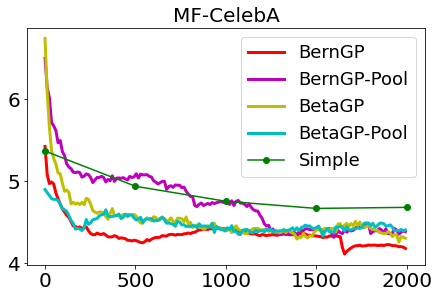

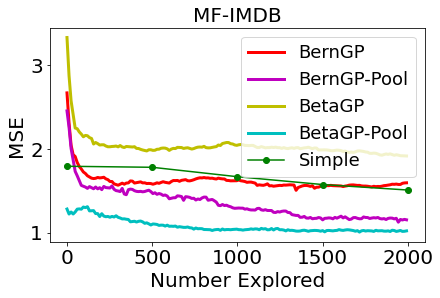

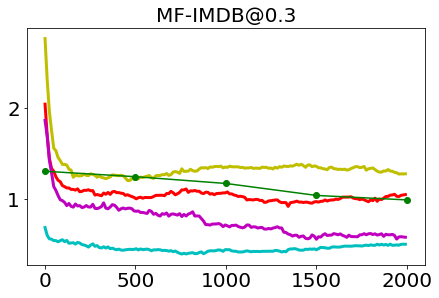

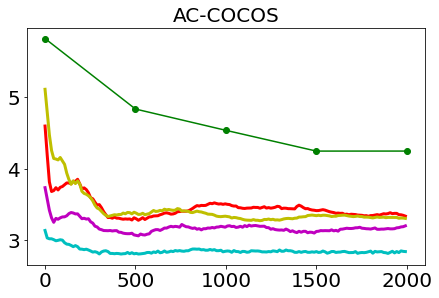

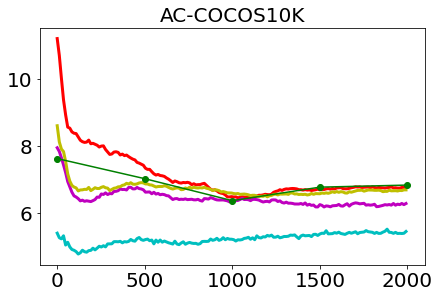

In [4]:
plot("celeba", "MF-CelebA", "plots/celeba_explore.pdf", legend=True)
# plot("celeba_private", "MF-IMDB", "plots/celebap_explore.pdf", legend=True, mark=True)
# plot("celeba_private", "MF-IMDB@0.3", "plots/celebap_explore2.pdf", idx=1)
plot("cocos3", "AC-COCOS", "plots/cocos_explore.pdf")
# plot("cocos3_10k", "AC-COCOS10K", "plots/cocos_10k_explore.pdf")

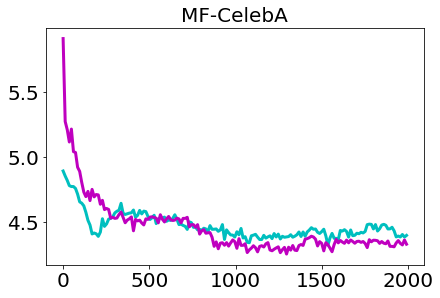

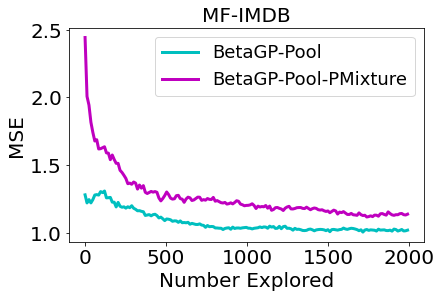

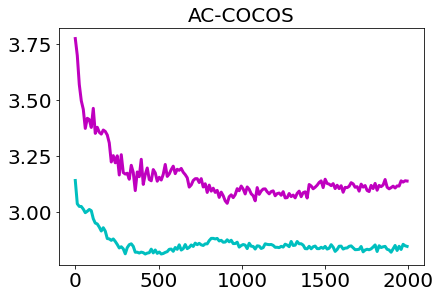

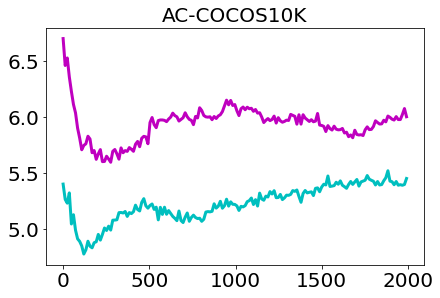

In [6]:
plot2("celeba", "MF-CelebA", "plots/celeba_rloss.pdf", legend=False)
plot2("celeba_private", "MF-IMDB", "plots/celebap_rloss.pdf", legend=True, mark=True)
plot2("cocos3", "AC-COCOS", "plots/cocos_rloss.pdf")
plot2("cocos3_10k", "AC-COCOS10K", "plots/cocos_10k_rloss.pdf")

In [8]:
import pickle
import numpy as np

def estimation_ablation(task):
    print ("Task: %s" % task)
    ckpt_names = ["data/"+task+"/bern_gp_explorer2_width="+str(w)+"_seed=%d_estimation_ablation.pkl" for w in [1, 3]]
    ckpt_names += ["data/"+task+"/beta_gp_rloss_explorer_width="+str(w)+"_seed=%d_estimation_ablation.pkl" for w in [1]]
    ckpt_names += ["data/"+task+"/beta_gp_rloss_explorer_width=3_seed=%d_estimation_ablation.pkl"]
    def m_s(ckpt_name, idx=0):
        m_s_dict = {}
        for seed in range(6):
            ckpt_name_wseed = ckpt_name % seed
            with open(ckpt_name_wseed, "rb") as f:
                x = pickle.load(f)
                for num in x.keys():
                    m_s_dict[num] = m_s_dict.get(num, []) + [x[num]]
        for num in m_s_dict.keys():
            _arr = np.stack(m_s_dict[num], axis=0)
            if ckpt_name.find('bern') >= 0:
                m_s_dict[num] = (np.mean(_arr, axis=0), np.std(_arr, axis=0))
            else:
                m_s_dict[num] = (np.mean(_arr, axis=0)[idx], np.std(_arr, axis=0)[idx])
        return m_s_dict
                
    with open("data/%s/cal:full.pkl" % task, "rb") as f:
        nums, errs, _, _ = zip(*pickle.load(f))
        cal_ws = dict(zip(nums, errs))
        
    m_s_dicts = [m_s(ckpt_name) for ckpt_name in ckpt_names]
    for wi in [500, 1500, 3000]:
        num = wi
        out_str = "|%d | %0.1f |" % (num, cal_ws[wi]*100)
        for mi, m_s_dict in enumerate(m_s_dicts):
            m, s = m_s_dict.get(wi, [np.nan, np.nan])
            out_str += ("%0.1f (%0.1f) |" % (m*100, s*100))
#             if mi < len(m_s_dicts) - 1:
#                 out_str += " |"
        print (out_str)
        
# estimation_ablation('celeba')
# estimation_ablation('celeba_private')
estimation_ablation('cocos3')
# estimation_ablation('cocos3_10k')

Task: cocos3


IndexError: invalid index to scalar variable.

In [9]:
import pickle
import numpy as np

def constant_predictor(task):
    print ("Task: %s" % task)
    ckpt_name = "data/"+task+"/beta_gp_rloss_mixture_explorer_width=1_seed=%d_cpred.pkl"
    def m_s(ckpt_name):
        m_s = []
        for seed in range(3):
            ckpt_name_wseed = ckpt_name % seed
            with open(ckpt_name_wseed, "rb") as f:
                x = pickle.load(f)
                m_s.append(x)
        return np.mean(m_s)*100, np.std(m_s)*100
        
    print(m_s(ckpt_name))
constant_predictor('celeba')
constant_predictor('celeba_private')
constant_predictor('cocos3')
constant_predictor('cocos3_10k')

Task: celeba
(5.1613993880979185, 0.07821670349046442)
Task: celeba_private
(1.1759482595451587, 0.019185633261964933)
Task: cocos3
(3.1849935928680533, 0.09977906404247537)
Task: cocos3_10k
(5.384911925661099, 0.19061642767305334)


In [5]:
import pickle
import numpy as np

def estimation_ablation(task):
    print ("Task: %s" % task)
    ckpt_names = ["data/"+task+"/beta_gp_rloss_explorer_width="+str(w)+"_st=raw_seed=%d_estimation_ablation.pkl" for w in [3]]
    ckpt_names += ["data/"+task+"/beta_gp_rloss_explorer_width="+str(w)+"_st=correctednoep_seed=%d_estimation_ablation.pkl" for w in [3]]
    ckpt_names += ["data/"+task+"/beta_gp_rloss_explorer_width="+str(w)+"_seed=%d_estimation_ablation.pkl" for w in [3]]
    def m_s(ckpt_name):
        m_s_dict = {}
        for seed in range(3):
            ckpt_name_wseed = ckpt_name % seed
            with open(ckpt_name_wseed, "rb") as f:
                x = pickle.load(f)
                for num in x.keys():
                    m_s_dict[num] = m_s_dict.get(num, []) + [x[num]]
        for num in m_s_dict.keys():
            _arr = m_s_dict[num]
            m_s_dict[num] = (np.mean(_arr), np.std(_arr))
        return m_s_dict
        
    with open("data/%s/cal:full.pkl" % task, "rb") as f:
        nums, errs, _, _ = zip(*pickle.load(f))
        cal_ws = dict(zip(nums, errs))
        
    m_s_dicts = [m_s(ckpt_name) for ckpt_name in ckpt_names]
    for wi in [500, 1500, 3000]:
        num = wi
        out_str = "%d & " % (num,)
        for mi, m_s_dict in enumerate(m_s_dicts):
            m, s = m_s_dict.get(wi, [np.nan, np.nan])
            out_str += ("%0.2f (%0.2f)" % (m*100, s*100))
            if mi < len(m_s_dicts) - 1:
                out_str += " & "
        print (out_str + "\\\\")
        
estimation_ablation('celeba')
estimation_ablation('celeba_private')
estimation_ablation('cocos3')
estimation_ablation('cocos3_10k')

Task: celeba


FileNotFoundError: [Errno 2] No such file or directory: 'data/celeba/beta_gp_rloss_explorer_width=3_st=raw_seed=0_estimation_ablation.pkl'

In [10]:
import pickle
import numpy as np

def constant_predictor(task, idx):
    ckpt_name = "data/"+task+"/cpred_seed=%d.pkl"
    def m_s(ckpt_name):
        m_s = []
        for seed in range(3):
            ckpt_name_wseed = ckpt_name % seed
            with open(ckpt_name_wseed, "rb") as f:
                x = pickle.load(f)[idx]
                m_s.append(x)
        return np.mean(m_s)*100, np.std(m_s)*100
        
    return m_s(ckpt_name)

def estimation_ablation(task, idx):
    print ("Task: %s" % task)
#     beta_gp_rloss_explorer_width=3_seed=1_estimation_ablation.pkl
    ckpt_names = []
    ckpt_names += ["data/"+task+"/simple_seed=%d_estimation_ablation.pkl"]
#     ckpt_names += ["data/"+task+"/beta_gp_rloss_explorer_width=1_seed=%d_estimation_ablation.pkl"]
#     ckpt_names += ["data/"+task+"/beta_gp_rloss_explorer_width=3_seed=%d_estimation_ablation.pkl"]
#     ckpt_names += ["data/"+task+"/beta_gp_rloss_mixture_explorer_width=1_ab_seed=%d_estimation_ablation.pkl"]
#     ckpt_names += ["data/"+task+"/beta_gp_rloss_mixture_explorer_width=3_ab_seed=%d_estimation_ablation.pkl"]
    def m_s(ckpt_name):
        m_s_dict = {}
        for seed in range(3):
            ckpt_name_wseed = ckpt_name % seed
            with open(ckpt_name_wseed, "rb") as f:
                x = pickle.load(f)
                for num in x.keys():
                    m_s_dict[num] = m_s_dict.get(num, []) + [x[num]]
        for num in m_s_dict.keys():
            _arr = np.stack(m_s_dict[num], axis=0)
            m_s_dict[num] = (np.mean(_arr, axis=0)[idx], np.std(_arr, axis=0)[idx])
        return m_s_dict
        
    with open("data/%s/cal:full.pkl" % task, "rb") as f:
        nums, errs, _, _ = zip(*pickle.load(f))
        cal_ws = dict(zip(nums, errs))
        
    print ("%0.2f / %0.2f" % (constant_predictor(task, idx)))
    m_s_dicts = [m_s(ckpt_name) for ckpt_name in ckpt_names]
    for wi in [500, 1500, 3000]:
        num = wi
        out_str = "|%d | " % (num,)
        for mi, m_s_dict in enumerate(m_s_dicts):
            m, s = np.nan, np.nan
            if wi in m_s_dict:
                _ = m_s_dict[wi]
                m, s = _[0], _[1]
            
            out_str += ("%0.1f / %0.1f" % (m*100, s*100))
            if mi < len(m_s_dicts) - 1:
                out_str += " | "
        print (out_str + "|")
        
for idx in [0, 1, 2, 3]:
    print ("\n\nIdx: %d\n" % idx)
    for d in ['celeba_private', 'celeba', 'cocos3', 'cocos3_10k']:
        estimation_ablation(d, idx)



Idx: 0

Task: celeba_private
1.18 / 0.02
|500 | 1.8 / 0.3|
|1500 | 1.6 / 0.1|
|3000 | 1.5 / 0.1|
Task: celeba
5.16 / 0.08
|500 | 4.9 / 0.3|
|1500 | 4.7 / 0.2|
|3000 | 4.5 / 0.2|
Task: cocos3
3.18 / 0.10
|500 | 4.8 / 0.3|
|1500 | 4.3 / 0.3|
|3000 | 4.1 / 0.1|
Task: cocos3_10k
5.38 / 0.19
|500 | 7.2 / 0.6|
|1500 | 7.0 / 0.6|
|3000 | 6.9 / 0.2|


Idx: 1

Task: celeba_private
0.18 / 0.01
|500 | 0.5 / 0.2|
|1500 | 0.3 / 0.1|
|3000 | 0.3 / 0.1|
Task: celeba
0.85 / 0.00
|500 | 0.8 / 0.1|
|1500 | 0.7 / 0.1|
|3000 | 0.6 / 0.1|
Task: cocos3
1.42 / 0.01
|500 | 2.0 / 0.1|
|1500 | 1.8 / 0.2|
|3000 | 1.7 / 0.1|
Task: cocos3_10k
2.97 / 0.02
|500 | 3.2 / 0.4|
|1500 | 3.4 / 0.2|
|3000 | 3.6 / 0.1|


Idx: 2

Task: celeba_private
5.41 / 0.14
|500 | 6.0 / 0.6|
|1500 | 5.6 / 0.5|
|3000 | 5.5 / 0.5|
Task: celeba
24.45 / 0.46
|500 | 22.4 / 1.9|
|1500 | 21.2 / 1.3|
|3000 | 20.4 / 1.5|
Task: cocos3
6.22 / 0.31
|500 | 7.4 / 0.4|
|1500 | 6.9 / 0.5|
|3000 | 6.3 / 0.4|
Task: cocos3_10k
10.07 / 0.63
|500 | 11.1 /

data/celeba_private/beta_gp_rloss_explore_svariance2_width=1_seed=%d.pkl
data/celeba_private/beta_gp_rloss_mixture_explore_svariance2_width=2_seed=%d.pkl
data/celeba_private/beta_gp_rloss_mixture_explore_svariance2_width=3_seed=%d.pkl
data/celeba_private/beta_gp_rloss_mixture_explore_svariance2_width=5_seed=%d.pkl


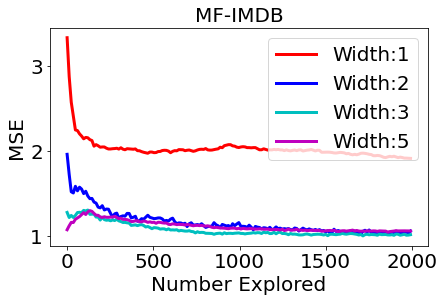

data/cocos3/beta_gp_rloss_explore_svariance2_width=1_seed=%d.pkl
data/cocos3/beta_gp_rloss_mixture_explore_svariance2_width=2_seed=%d.pkl
data/cocos3/beta_gp_rloss_mixture_explore_svariance2_width=3_seed=%d.pkl
data/cocos3/beta_gp_rloss_mixture_explore_svariance2_width=5_seed=%d.pkl


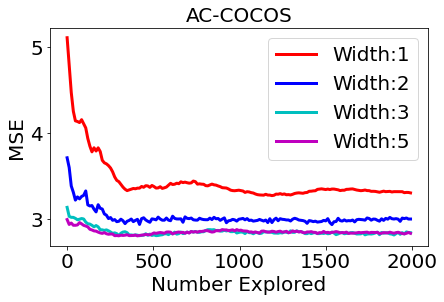

In [88]:
def plot_width(task, title, save_name, idx=0, legend=False):
    fmts, widths = ["r-", "b-", "c-", "m-"], [1, 2, 3, 5]
    for wi in range(len(widths)):
        width = widths[wi]
        if width == 1:
            ckpt_name = "data/" + task + "/beta_gp_rloss_explore_svariance2_width="+str(width)+"_seed=%d.pkl"
        else:
            ckpt_name = "data/" + task + "/beta_gp_rloss_mixture_explore_svariance2_width="+str(width)+"_seed=%d.pkl"
        print (ckpt_name)
        num_errs = fetch(ckpt_name, range(3))
        plt.plot(num_errs[0], num_errs[idx+1], fmts[wi], label="Width:%d" % width, linewidth=3)
    
    plt.xlabel('Number Explored')
    plt.ylabel('MSE')
    plt.title(title, fontdict = {'fontsize' : 20})
    if legend:
        plt.legend(prop={'size': 20})
    plt.tight_layout(pad=0.0)
    plt.savefig(save_name)
    plt.show()
    
plot_width("celeba_private", "MF-IMDB", "plots/celebap_width.pdf", legend=True)
plot_width("cocos3", "AC-COCOS", "plots/cocos_width.pdf", legend=True)

data/celeba_private/beta_gp_rloss_mixture_explore_svariance2_width=3_falpha=-1.00_seed=%d.pkl
data/celeba_private/beta_gp_rloss_mixture_explore_svariance2_width=3_falpha=-0.25_seed=%d.pkl
data/celeba_private/beta_gp_rloss_mixture_explore_svariance2_width=3_falpha=0.25_seed=%d.pkl
data/celeba_private/beta_gp_rloss_mixture_explore_svariance2_width=3_falpha=1.00_seed=%d.pkl


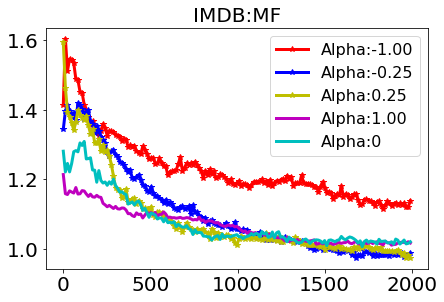

data/cocos3/beta_gp_rloss_mixture_explore_svariance2_width=3_falpha=-1.00_seed=%d.pkl
data/cocos3/beta_gp_rloss_mixture_explore_svariance2_width=3_falpha=-0.25_seed=%d.pkl
data/cocos3/beta_gp_rloss_mixture_explore_svariance2_width=3_falpha=0.25_seed=%d.pkl
data/cocos3/beta_gp_rloss_mixture_explore_svariance2_width=3_falpha=1.00_seed=%d.pkl


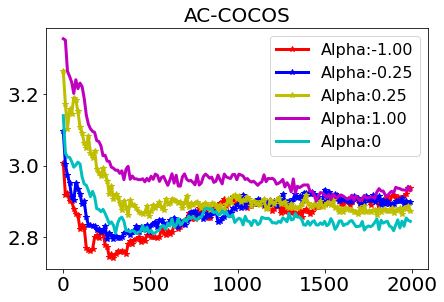

In [5]:
def plot_width(task, title, save_name, idx=0, legend=False):
    fmts, alphas = ["r-*", "b*-", "y-*", "m-"], [-1, -0.25, 0.25, 1]
    for ai in range(len(alphas)):
        alpha = alphas[ai]
        
        ckpt_name = "data/" + task + "/beta_gp_rloss_mixture_explore_svariance2_width=3_falpha="+("%0.2f" % alpha)+"_seed=%d.pkl"
        print (ckpt_name)
        num_errs = fetch(ckpt_name, range(3))
        plt.plot(num_errs[0], num_errs[idx+1], fmts[ai], label="Alpha:%0.2f" % alpha, linewidth=3)
    
    ckpt_name = "data/" + task + "/beta_gp_rloss_mixture_explore_svariance2_width=3_seed=%d.pkl"
    num_errs = fetch(ckpt_name, range(3))
    plt.plot(num_errs[0], num_errs[idx+1], "c-", label="Alpha:0", linewidth=3)
    
    plt.title(title, fontdict = {'fontsize' : 20})
    if legend:
        plt.legend(loc='upper right', prop={'size': 16})
    plt.tight_layout(pad=0)
    plt.savefig(save_name)
    plt.show()
    
plot_width("celeba_private", "IMDB:MF", "plots/celebap_support.pdf", legend=True)
plot_width("cocos3", "AC-COCOS", "plots/cocos_support.pdf", legend=True)

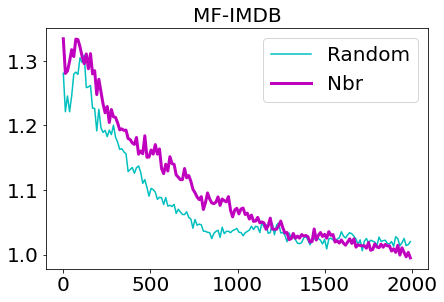

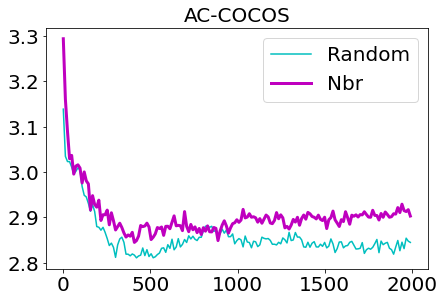

In [79]:
def plot_nbr(task, title, save_name, idx=0, legend=False):    
    ckpt_name = "data/" + task + "/beta_gp_rloss_mixture_explore_svariance2_width=3_seed=%d.pkl"
    num_errs = fetch(ckpt_name, range(3))
    plt.plot(num_errs[0], num_errs[idx+1], "c-", label="Random")
    
    ckpt_name = "data/" + task + "/beta_gp_rloss_mixture_explore_svariance2_width=3_nbr_seed=%d.pkl"
    num_errs = fetch(ckpt_name, range(3))
    plt.plot(num_errs[0], num_errs[idx+1], "m-", label="Nbr", linewidth=3)
    
    plt.title(title, fontdict = {'fontsize' : 20})
    if legend:
        plt.legend(prop={'size': 20})
    plt.tight_layout(pad=0.0)
    plt.savefig(save_name)
    plt.show()
    
plot_nbr("celeba_private", "MF-IMDB", "plots/celebap_nbr.pdf", legend=True)
plot_nbr("cocos3", "AC-COCOS", "plots/cocos_nbr.pdf", legend=True)

## plot one more metric

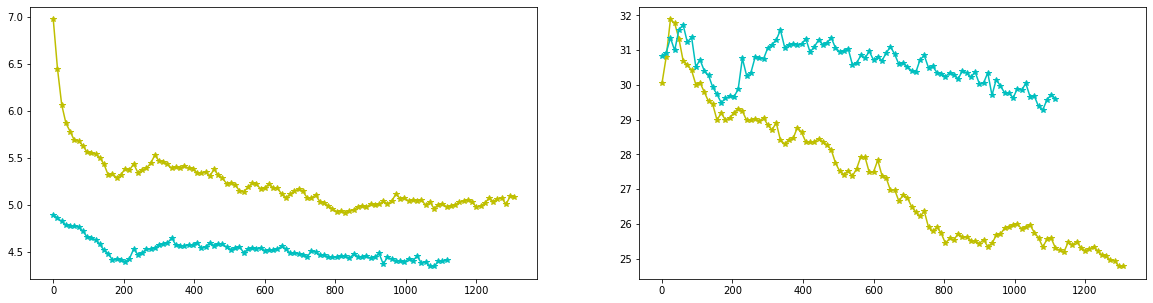

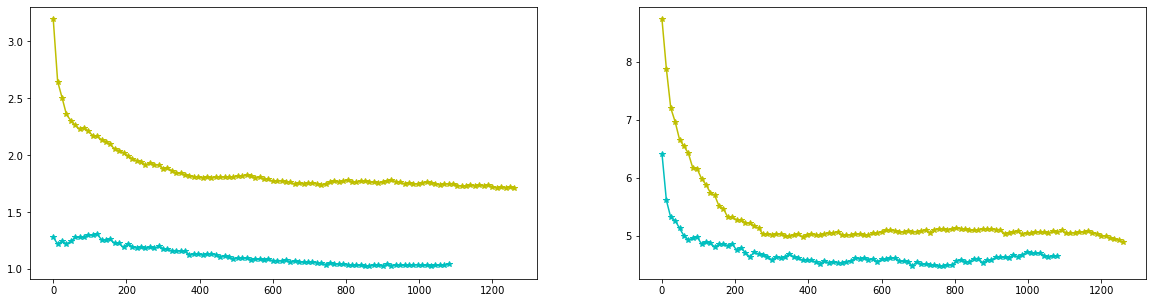

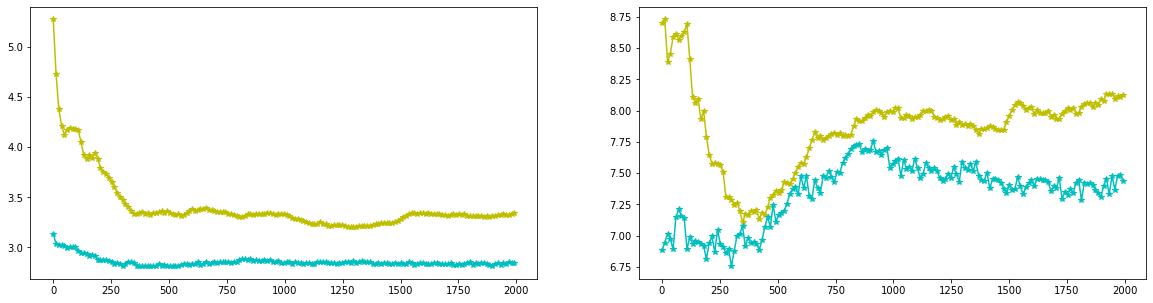

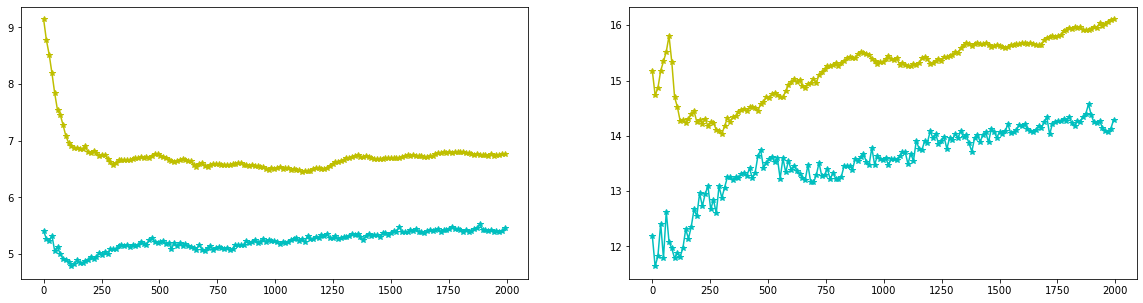

In [77]:
from matplotlib import pyplot as plt
import bisect

def fetch_new(file_fmt, seeds=range(3)):
    nums, errs = [], []
    for seed in seeds:
        file_name = file_fmt % seed
        with open(file_name, "rb") as f:
            perf_bern = pickle.load(f)
            num, _err1 = zip(*perf_bern)
            ni = bisect.bisect_right(num, 2000)
            
            nums.append(num[:ni])
            errs.append(_err1[:ni])
    _n = min([len(num) for num in nums])
    _e1 = np.mean(np.array([errs[ei][:_n] for ei in range(len(seeds))]), axis=0)
    idxs = np.array([_ for _ in range(_n) if np.random.random() < 0.2])
    return nums[0][:_n], 100*_e1

def plot_new(task):
    fig, axis = plt.subplots(1, 2, figsize=(20, 5))
    
    fnames = ["beta_gp_rloss_explore_svariance2_width=1", "beta_gp_rloss_explore_svariance2_width=3"]
    labels, fmts = ["BetaGP", "BetaGP-Pool"], ["y-*", "c-*"]
    for fi in range(len(fnames)):
        nums, errs = fetch_new("data/" + task + "/" + fnames[fi] + "_mse_seed=%d.pkl")
        axis[0].plot(nums, errs, fmts[fi], label=labels[fi])
        nums, errs = fetch_new("data/" + task + "/" + fnames[fi] + "_worst_seed=%d.pkl")
        axis[1].plot(nums, errs, fmts[fi], label=labels[fi])
    plt.show()
    
plot_new("celeba")
plot_new("celeba_private")
plot_new("cocos3")
plot_new("cocos3_10k")